# Figures 19 \& 20

In [3]:
from wind_ae.wrapper.relax_wrapper import wind_simulation as wind_sim
from wind_ae.wrapper.wrapper_utils import constants as const

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pylab as pylab
import wind_ae.McAstro.atoms.atomic_species as McAtom

Atmosphere Composition
  Species:   HI,        HeI
  Mass frac: 8.00e-01, 2.00e-01



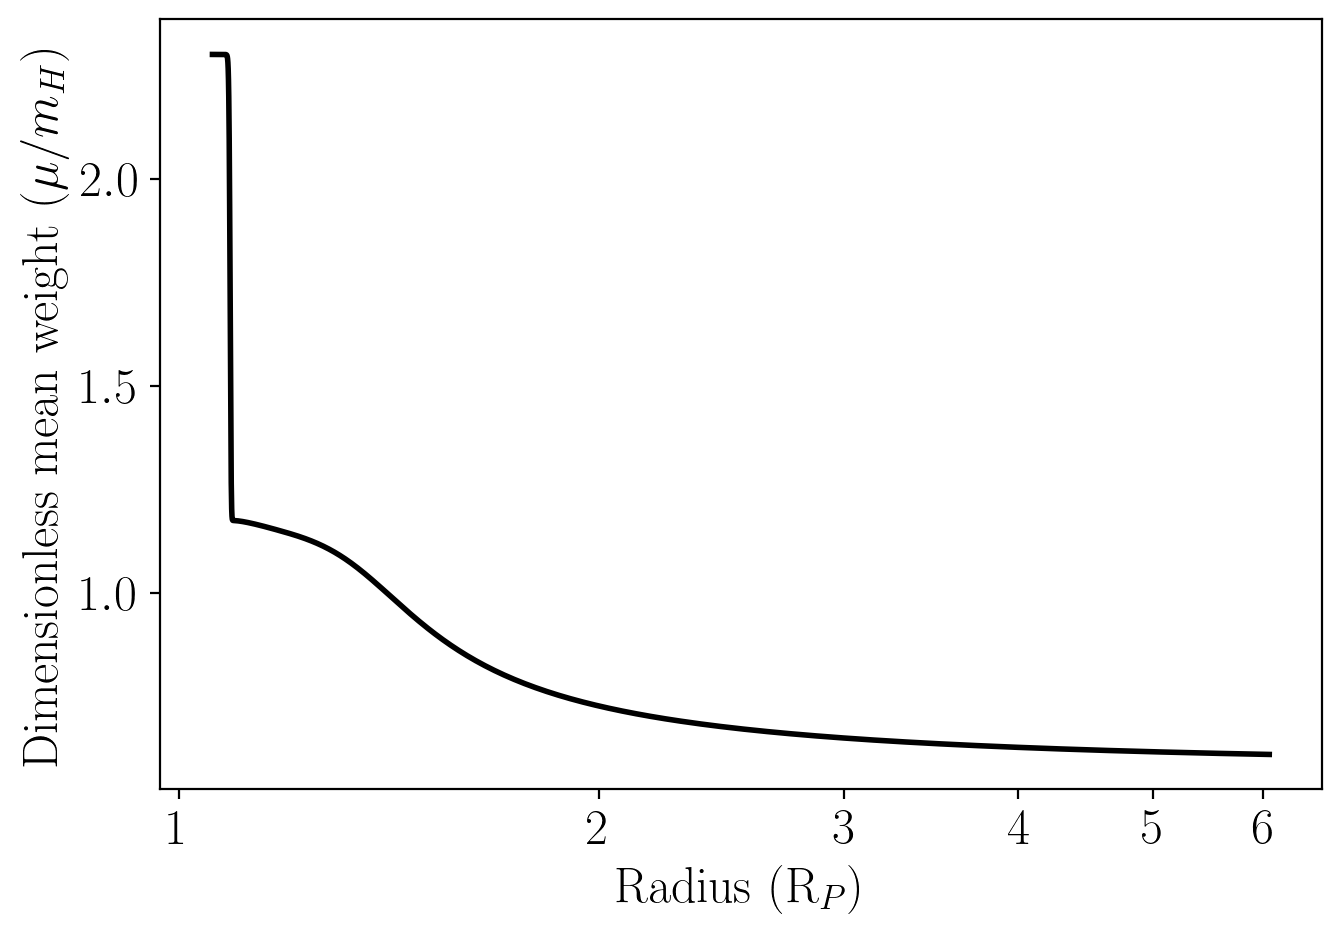

/var/folders/1b/b30tn34j4p104kcg6lt_mnf00000gn/T/ipykernel_51248/3098903004.py:14: RuntimeWarning: divide by zero encountered in divide
  return const.hc / (energy*const.eV) / 1e-7 # Convert eV to nm
/var/folders/1b/b30tn34j4p104kcg6lt_mnf00000gn/T/ipykernel_51248/3098903004.py:14: RuntimeWarning: divide by zero encountered in divide
  return const.hc / (energy*const.eV) / 1e-7 # Convert eV to nm
/var/folders/1b/b30tn34j4p104kcg6lt_mnf00000gn/T/ipykernel_51248/3098903004.py:14: RuntimeWarning: divide by zero encountered in divide
  return const.hc / (energy*const.eV) / 1e-7 # Convert eV to nm


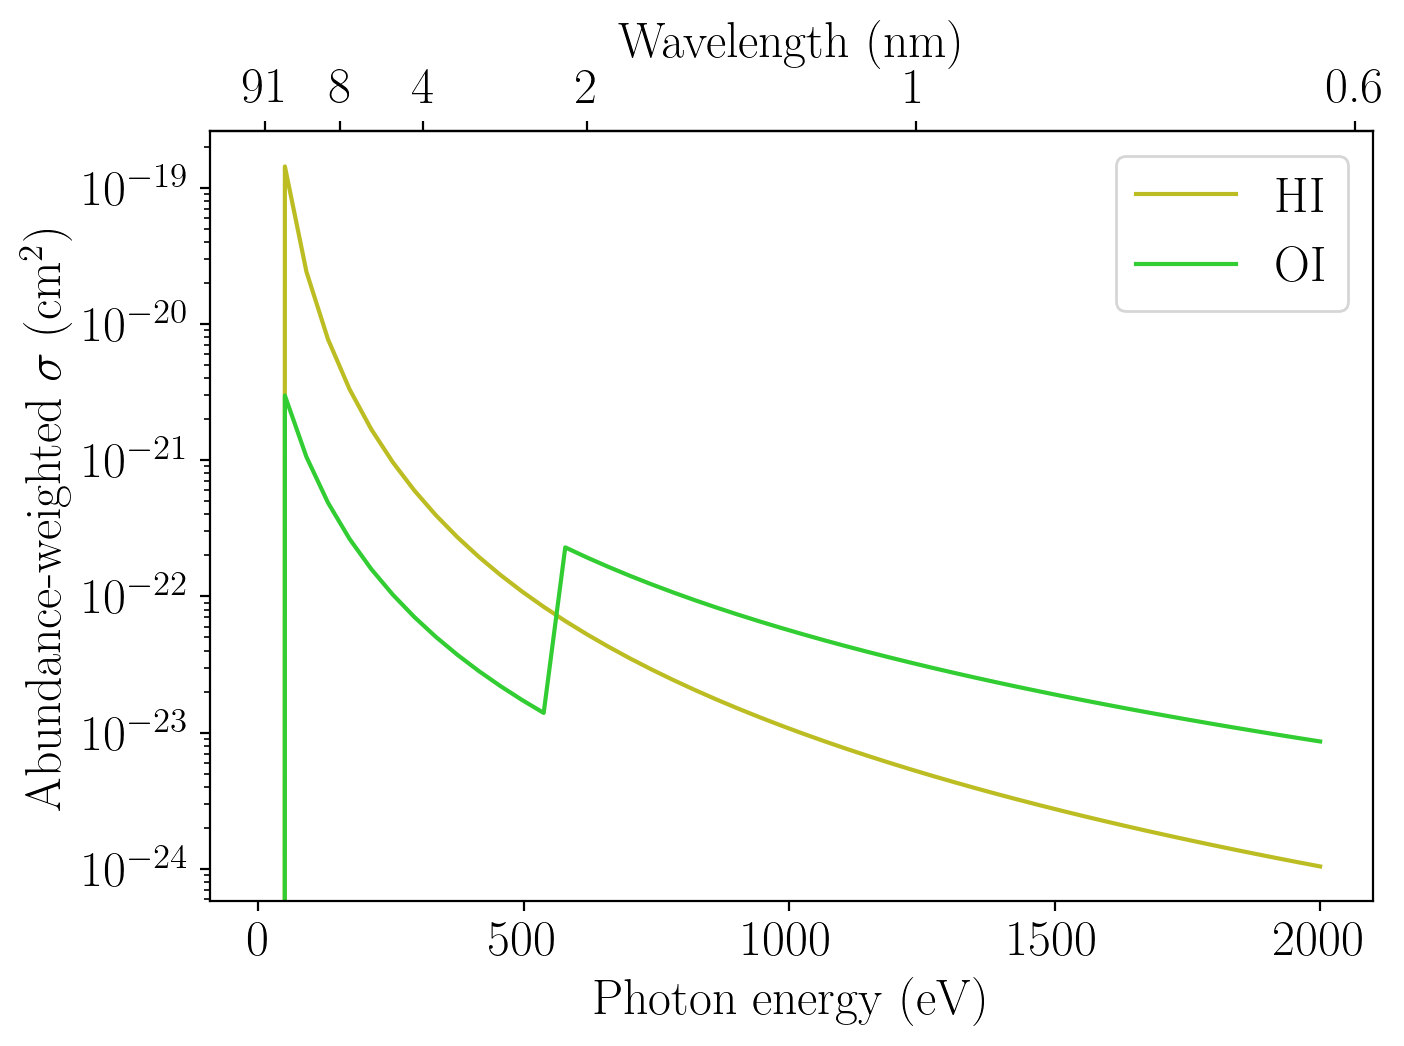

In [6]:
sim = wind_sim()
sim.load_planet('data/HD209_13.6-2000eV_H-He.csv')
pylab.rcParams['font.size'] = 18

fig,ax = plt.subplots(figsize=[7.5,5])
ax.plot(sim.windsoln.soln_norm['r'],sim.windsoln.soln['mu']/const.mH,c='k',lw=2)
ax.set_xscale('log')
ax.set_xlabel(r'Radius (R$_P$)')
ax.set_ylabel(r'Dimensionless mean weight ($\mu/m_H$)')
ax.set_xticks([1,2,3,4,5,6],['1','2','3','4','5','6'])
plt.show()

def energy_to_wavelength(energy):
    return const.hc / (energy*const.eV) / 1e-7 # Convert eV to nm

def wavelength_to_energy(wavelength):
    return const.hc / ((wavelength*1e-7 ) * const.eV)  # Convert nm to eV


# Plot data using energy as x-axis
eVs = np.linspace(10,2000)
hI = McAtom.atomic_species('H I').cross_section(eVs)
CI = McAtom.atomic_species('O I').cross_section(eVs)

mult = sim.calc_metallicity(['HI','HeI','OI'],1)/np.array([const.mH,6.6e-24,2.66e-23])
mult/=sum(mult)

fig,ax = plt.subplots(figsize=[7.5,5])

ax.plot(eVs,hI*mult[0], 'tab:olive',label='HI')
ax.plot(eVs,CI*mult[2] , 'limegreen',label='OI')
ax.set_xlabel('Energy (eV)')
ax.tick_params(axis='x')
ax.set_yscale('log')
ax.set_ylabel(r'Abundance-weighted $\sigma$ (cm$^2$)')
ax.set_xlabel('Photon energy (eV)')
plt.legend()

# Create secondary x-axis for wavelength
ax_wavelength = ax.secondary_xaxis('top', functions=(wavelength_to_energy,energy_to_wavelength))
ax_wavelength.set_xlabel('Wavelength (nm)')
ax_wavelength.tick_params(axis='x')
ticks = [91,10,2,1,0.6]
ax_wavelength.set_xticks([91,8,4,2,1,0.6],['91','8','4','2','1','0.6'])

plt.show()